In [51]:
%matplotlib inline

import numpy as np
import os
import matplotlib
import matplotlib.pyplot as plt

plt.rcParams['axes.facecolor']='white'
# plt.style.use('bmh')

import geopandas as gpd
import pandas as pd
# import cartopy.crs as ccrs

In [52]:
# Drop columns we don't need:
# Here we will drop the columns that do not serve in our specific analysis.
def remove_zeros(df):
    """" Here we will drop the records of zeroes that do not serve in our specific analysis.
    """
    pud = df[(df['PUD_YR_AVG']>0)]
    return pud

def find_proportion(gdf, column):
    """Here we want to take the sum of the yearly average. and divide each entry by this value. 
    Parameters: gdf = geopandas dataframe
                column = column of interest located within the gdf geopandas dataframe.
    gdf[column + proportion_sum] = a specific gdf column  / sum(gdf with a specific column) 
        """
    gdf[column + 'proportion_sum'] = gdf[column] / np.sum(gdf[column]) 
    assert gdf[column].shape == gdf[column + "proportion_sum"].shape
    return gdf[column + 'proportion_sum']



In [66]:
def cmap_discretize(cmap, N):
    """Return a discrete colormap from the continuous colormap cmap.
    
        cmap: colormap instance, eg. cm.jet. 
        N: number of colors.
    """
    if type(cmap) == str:
        cmap = matplotlib.cm.get_cmap(cmap)
    colors_i = np.concatenate((np.linspace(0, 1., N), (0.,0.,0.,0.)))
    colors_rgba = cmap(colors_i)
    indices = np.linspace(0, 1., N+1)
#     indices = [0, 0.001, 0.002, 0.004, 0.008, 0.016, 0.032, 0.064]
    print(indices)
    cdict = {}
    for ki, key in enumerate(('red','green','blue')):
        cdict[key] = [(indices[i], colors_rgba[i-1,ki], colors_rgba[i,ki]) for i in range(N+1)]
    # Return colormap object.
    print(cdict)
    return matplotlib.colors.LinearSegmentedColormap(cmap.name + "_%d"%N, cdict, 1024)

In [80]:
def pudMap(file, column, metadata):
    """ Reads the shape file and from the list of file names selects the specified file to make a plot
        we may also want to apply the normalizing functions we defined earlier where the default is the annual
        average.
    """
    # make a geopandas dataframe. 
    shp = gpd.read_file(file)
    shp = remove_zeros(shp)
    find_proportion(shp, column)
    
    # Create a figure of the desired size:
    fig = plt.figure(figsize=(5,5))  
    ax = plt.axes()
    ax.grid(False)
    plt.tick_params(
        axis='both',          # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        right='off',
        left='off',
        bottom='off',      # ticks along the bottom edge are off
        top='off',         # ticks along the top edge are off
        labelbottom='off',
        labelleft='off') # labels along the bottom edge are off

    plt.suptitle(metadata['parkname'], fontsize=14)
    plt.title(metadata['parkvis'], fontsize=10)
    fig.text(.12,.08,metadata['cellsize'])

    plot = shp.plot(ax=ax, column = column + 'proportion_sum',cmap = 'inferno', legend = True)
#     plot = shp.plot(ax=ax, column = column + 'proportion_sum',cmap = cmap_discretize('inferno', 10), legend = True)
    return plot

In [11]:
list_all_files = os.listdir('../matt/OUTPUT')

In [22]:
list_all_files

['natcap.invest.recreation.recmodel_client-log-2017-09-14--16_51_26.txt',
 'pud_results_04_1000_2005_2014.shp',
 'pud_results_03_1000_2005_2014.dbf',
 'natcap.invest.recreation.recmodel_client-log-2017-09-14--16_52_39.txt',
 'pud_results_02_1000_2005_2014.prj',
 'pud_results_05_1000_2005_2014.shx',
 'monthly_table_04_1000_2005_2014.csv',
 'Archive',
 'pud_results_04_1000_2005_2014.dbf',
 'pud_results_01_1000_2005_2014.dbf',
 'monthly_table_03_1000_2005_2014.csv',
 'pud_results_04_1000_2005_2014.shx',
 'pud_results_02_1000_2005_2014.dbf',
 'pud_results_03_1000_2005_2014.prj',
 'pud_results_05_1000_2005_2014.shp',
 'monthly_table_01_1000_2005_2014.csv',
 'pud_results_01_1000_2005_2014.shx',
 'natcap.invest.recreation.recmodel_client-log-2017-09-14--16_54_30.txt',
 'monthly_table_02_1000_2005_2014.csv',
 'pud_results_04_1000_2005_2014.prj',
 'pud_results_01_1000_2005_2014.prj',
 'monthly_table_05_1000_2005_2014.csv',
 'pud_results_03_1000_2005_2014.shx',
 'pud_results_05_1000_2005_2014.db

In [13]:
list_files = []
for names in list_all_files:
    if names.endswith(".shp"):
        list_files.append(names)

In [14]:
list_files

['pud_results_04_1000_2005_2014.shp',
 'pud_results_05_1000_2005_2014.shp',
 'pud_results_01_1000_2005_2014.shp',
 'pud_results_02_1000_2005_2014.shp',
 'pud_results_03_1000_2005_2014.shp']

In [31]:
shpname = list_files[0]
shp_path = os.path.join('../matt/OUTPUT', shpname)

In [30]:
# pudMap(shp_path, "PUD_YR_AVG")

In [36]:
metadata = pd.read_csv('../matt/ParkBounds/All_NPS_Park_Bounds_Ranked.csv')

In [37]:
metadata

,UNIT_CODE,GIS_Notes,UNIT_NAME,DATE_EDIT,STATE,REGION,GNIS_ID,UNIT_TYPE,CREATED_BY,METADATA,PARKNAME,Park,Rank,2016_Visit
0,OLYM,LEGACY: contact allen_mccoy@nps.gov for additi...,Olympic National Park,2015/04/22,WA,PW,1530459,National Park,Legacy,NaN,Olympic,Olympic NP,7,3390221
1,MEVE,Lands - http://landsnet.nps.gov/tractsnet/docu...,Mesa Verde National Park,2009/08/04,CO,IM,179042,National Park,Lands,https://irma.nps.gov/App/Reference/Profile/104...,Mesa Verde,Mesa Verde NP,34,583527
2,GRBA,Lands - http://landsnet.nps.gov/tractsnet/docu...,Great Basin National Park,2009/09/10,NV,PW,862430,National Park,Lands,https://irma.nps.gov/App/Reference/Profile/104...,Great Basin,Great Basin NP,49,144846
3,GAAR,Lands - http://landsnet.nps.gov/tractsnet/docu...,Gates of the Arctic National Park,2016/09/21,AK,AK,1416040,National Park,Lands,https://irma.nps.gov/App/Reference/Profile/222...,Gates of the Arctic,Gates of the Arctic NP & PRES,59,10047
4,ACAD,LEGACY: NPS Inventory and Monitoring Program D...,Acadia National Park,2013/12/18,ME,NE,578853,National Park,Legacy,NaN,NaN,Acadia NP,8,3303393
5,KICA,Lands - http://landsnet.nps.gov/tractsnet/docu...,Kings Canyon National Park,2011/10/17,CA,PW,255948,National Park,Lands,https://irma.nps.gov/App/Reference/Profile/218...,Kings Canyon,Kings Canyon NP,31,607479
6,BLCA,Lands - http://landsnet.nps.gov/tractsnet/docu...,Black Canyon of the Gunnison National Park,2017/05/12,CO,IM,203271,National Park,Lands,https://irma.nps.gov/App/Reference/Profile/104...,Black Canyon of the Gunnison,Black Canyon of the Gunnison NP,46,238018
7,GLBA,Lands - http://landsnet.nps.gov/tractsnet/docu...,Glacier Bay National Park,2016/09/21,AK,AK,1416041,National Park,Lands,https://irma.nps.gov/App/Reference/Profile/222...,Glacier Bay,Glacier Bay NP & PRES,37,520171
8,PEFO,Lands - http://landsnet.nps.gov/tractsnet/docu...,Petrified Forest National Park,2017/05/10,AZ,IM,23864,National Park,Lands,https://irma.nps.gov/App/Reference/Profile/220...,Petrified Forest,Petrified Forest NP,29,643274
9,KATM,Lands - http://landsnet.nps.gov/tractsnet/docu...,Katmai National Park,2016/09/21,AK,AK,1416045,National Park,Lands,https://irma.nps.gov/App/Reference/Profile/222...,Katmai,Katmai NP & PRES,53,37818


In [32]:
shpname

'pud_results_04_1000_2005_2014.shp'

In [39]:
split_name = shpname.split('_')
rank = int(split_name[2])
cellsize = split_name[3]
print(rank)
print(cellsize)

4
1000


In [40]:
parkdata = metadata[metadata.Rank == rank]

In [41]:
parkdata

,UNIT_CODE,GIS_Notes,UNIT_NAME,DATE_EDIT,STATE,REGION,GNIS_ID,UNIT_TYPE,CREATED_BY,METADATA,PARKNAME,Park,Rank,2016_Visit
48,ROMO,Lands - http://landsnet.nps.gov/tractsnet/docu...,Rocky Mountain National Park,2013/11/20,CO,IM,204948,National Park,Lands,https://irma.nps.gov/App/Reference/Profile/220...,Rocky Mountain,Rocky Mountain NP,4,4517585


In [71]:
parkname = parkdata['PARKNAME'].values[0]
parkvis = str(round(parkdata['2016_Visit'].values[0]/1e6, 2)) + ' million'
parkmeta = {'parkname':parkname, 'parkvis':parkvis, 'cellsize':str(cellsize) + ' meter cells'}

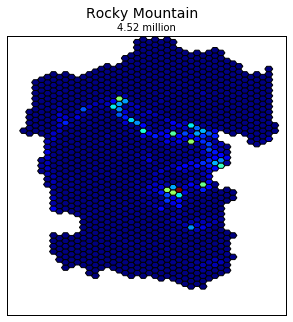

In [42]:


# Create a figure of the desired size:
fig = plt.figure(figsize=(5,5))  
ax = plt.axes()
ax.grid(False)
plt.tick_params(
    axis='both',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    right='off',
    left='off',
    bottom='off',      # ticks along the bottom edge are off
    top='off',         # ticks along the top edge are off
    labelbottom='off',
    labelleft='off') # labels along the bottom edge are off

plt.suptitle(parkname, fontsize=14)
plt.title(parkvis, fontsize=10)

# shp.plot(ax=ax, column="PUD_YR_AVG")
pudMap(shp_path, "PUD_YR_AVG")

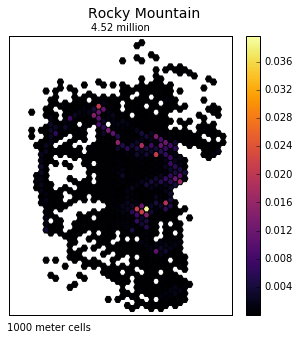

In [81]:
pudMap(shp_path, "PUD_YR_AVG", parkmeta)